<h1>Chi-Quadrat-Verteilung</h1>

Die $\chi ^2$-Verteilung ist durch den $\chi ^2$-Test bekannt. Wir werden uns der Verteilung nähern, indem wir wieder von einem kleinen Beispielproblem ausgehen.

Angenommen wir fragen an zwei unterschiedlichen Universitäten jeweils $n=100$ zufällige Studenten nach ihrem bevorzugten Essen (Weißwurst oder Wuarkkeulchen), um herauszufinden, ob sich das Lieblingsessen regional unterscheidet. Das Resultat sieht wie folgt aus:

| Uni\Gericht | Weißwurst mit Bier | Quarkkeulchen mit Apfelmark |
| --- | --- | --- |
| TU Dresden | 38 | 62 |
| TU München | 55 | 45 |

Nun stellt sich die Frage: Ist dieses Resultat statistisch signifikant unterschiedlich von der Nullhypothese, dass die Region keinen Einfluss auf das Lieblingsessen hat? Falls $H_0$ war ist, müssten alle vier Ergebnisse um den Wert $\frac{n}{2}=50$ fluktuieren, wobei diese Fluktuationen als statistische Fehler normalverteilt sein müssten.

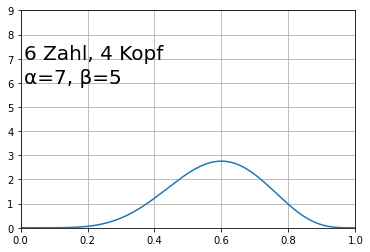

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pylab as p

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, 7, 5))
plt.grid(True)
plt.xlim([0,1])
plt.ylim([0,9])
#plt.fill_between(x[500:668], stats.norm.pdf(x[500:668], mu, sigma))
#p.fill(x[100:-1], stats.norm.pdf(x[100:-1], mu, sigma), facecolor='blue', alpha=0.5)
plt.text(0.01, 7,'6 Zahl, 4 Kopf', size=20)
plt.text(0.01, 6,u'\u03b1=7, \u03b2=5', size=20)
plt.show()

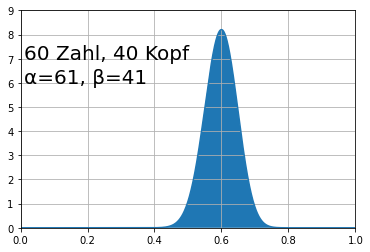

In [2]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, 61, 41))
plt.grid(True)
plt.xlim([0,1])
#plt.fill_between(x[500:668], stats.norm.pdf(x[500:668], mu, sigma))
#p.fill(x[100:-1], stats.norm.pdf(x[100:-1], mu, sigma), facecolor='blue', alpha=0.5)
plt.text(0.01, 7,'60 Zahl, 40 Kopf', size=20)
plt.text(0.01, 6,u'\u03b1=61, \u03b2=41', size=20)
plt.fill_between(x, stats.beta.pdf(x, 61, 41))
plt.ylim([0,9])
plt.show()

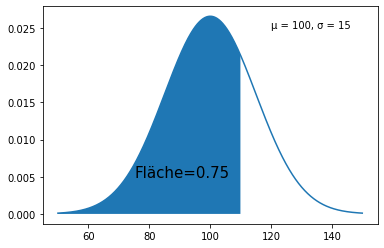

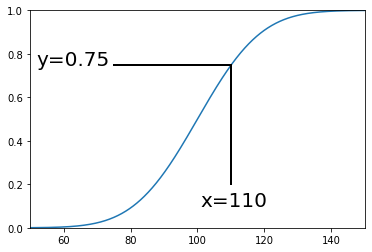

In [3]:
from scipy.stats import norm

x = np.arange(50, 150, 0.1)
plt.plot(x, norm.pdf(x, loc = 100, scale = 15), ms=8, label='Normal Pdf')
plt.text(120,0.025,u'\u03bc = %d, \u03c3 = %d'%(100, 15))
plt.text(75,0.005,'Fläche=0.75', size=15)
plt.fill_between(np.arange(50,110,0.1), norm.pdf(np.arange(50,110,0.1), loc = 100, scale = 15))
plt.savefig('flaeche_gauss.png')
plt.show()

plt.plot(x, norm.cdf(x, loc = 100, scale = 15), ms=8, label='Normal Pdf')
plt.text(52, norm.cdf(110, loc = 100, scale = 15),'y=%.2f'%norm.cdf(110, loc = 100, scale = 15), size=20)
plt.text(101, 0.1,'x=110', size=20)
plt.plot([110, 110], [0.2, norm.cdf(110, loc = 100, scale = 15)], 'k-', lw=2)
plt.plot([75, 110], [norm.cdf(110, loc = 100, scale = 15), norm.cdf(110, loc = 100, scale = 15)], 'k-', lw=2)
plt.ylim([0, 1])
plt.xlim([50, 150])
plt.savefig('cumulative_gauss.png')
plt.show()

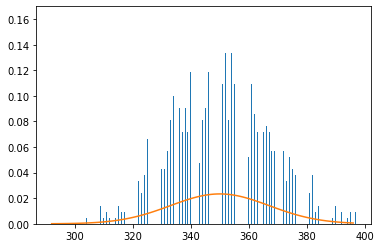

In [5]:
import random

n = 100

iterations = 1000
list_of_sums = []

for it in range(iterations):
    sum_of_random_variables = 0

    for i in range(n):
        sum_of_random_variables += random.randint(1, 6)
    
    list_of_sums.append(sum_of_random_variables)
    
    
interval = n*6 - n
mu = n*3.5
stdabweichung = np.sqrt(35/12)*np.sqrt(n)
min_of_sums = np.min(list_of_sums)
max_of_sums = np.max(list_of_sums)

x = np.arange(min_of_sums, max_of_sums, 1)
plt.hist(list_of_sums , bins=interval, density = True)
plt.plot(x, norm.pdf(x, loc = mu, scale = stdabweichung), ms=8, label='Normal Pdf')
plt.show()